#Trabajo Práctico N° 4 - Histogramas de Luminancia

En este trabajo, alteraremos la luminancia de una imagen con el objetivo de mejorar el contraste y producir una imagen más nítida. Como siempre levantamos dos imágenes que podemos considerar con problemas de constraste opuestos.



In [1]:
#Mounting 
from google.colab import drive 

drive.mount('/content/gdrive')

drive_dir = '/content/gdrive/My Drive/Doctorado/PDI/images/' #Directory

Mounted at /content/gdrive


In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

#CONVERSION FROM RGB TO YIQ SPACES
def RGBtoYIQ(img_rgb):
  coef = np.array([[   0.299,     0.587,     0.114],
                   [0.595716, -0.274453, -0.321263],
                   [0.211456, -0.522591,  0.311135]])
  
  img_norm = img_rgb / 255 #Normalization of RGB vector
  dims = img_rgb.shape
  img_yiq = np.zeros(dims)
  for i in range(dims[0]):
    for j in range(dims[1]):
      img_yiq[i, j, :] = np.matmul(coef, img_norm[i, j, :])
  np.clip(img_yiq[:,:,0],       0,      1, out=img_yiq[:,:,0])  #       0 <= Y <= 1
  np.clip(img_yiq[:,:,1], -0.5957, 0.5957, out=img_yiq[:,:,1])  # -0.5957 <= I <= 0.5957
  np.clip(img_yiq[:,:,2], -0.5226, 0.5226, out=img_yiq[:,:,2])  # -0.5226 <= Q <= 0.5226
  return img_yiq

#CONVERSION FROM YIQ TO RGB SPACES
def YIQtoRGB(img_yiq):
  coef = np.array([[1,  0.9663,  0.6210],
                   [1, -0.2721, -0.6474],
                   [1, -1.1070,  1.7046]])
  
  dims = img_yiq.shape
  img_norm_rgb = np.zeros(dims)
  for i in range(dims[0]):
    for j in range(dims[1]):
      img_norm_rgb[i, j, :] = np.matmul(coef, img_yiq[i, j, :])
  np.clip(img_norm_rgb, 0, 1, out=img_norm_rgb)
  return np.uint8(np.floor(img_norm_rgb * 255)) #De-normalization of normalized RGB vector

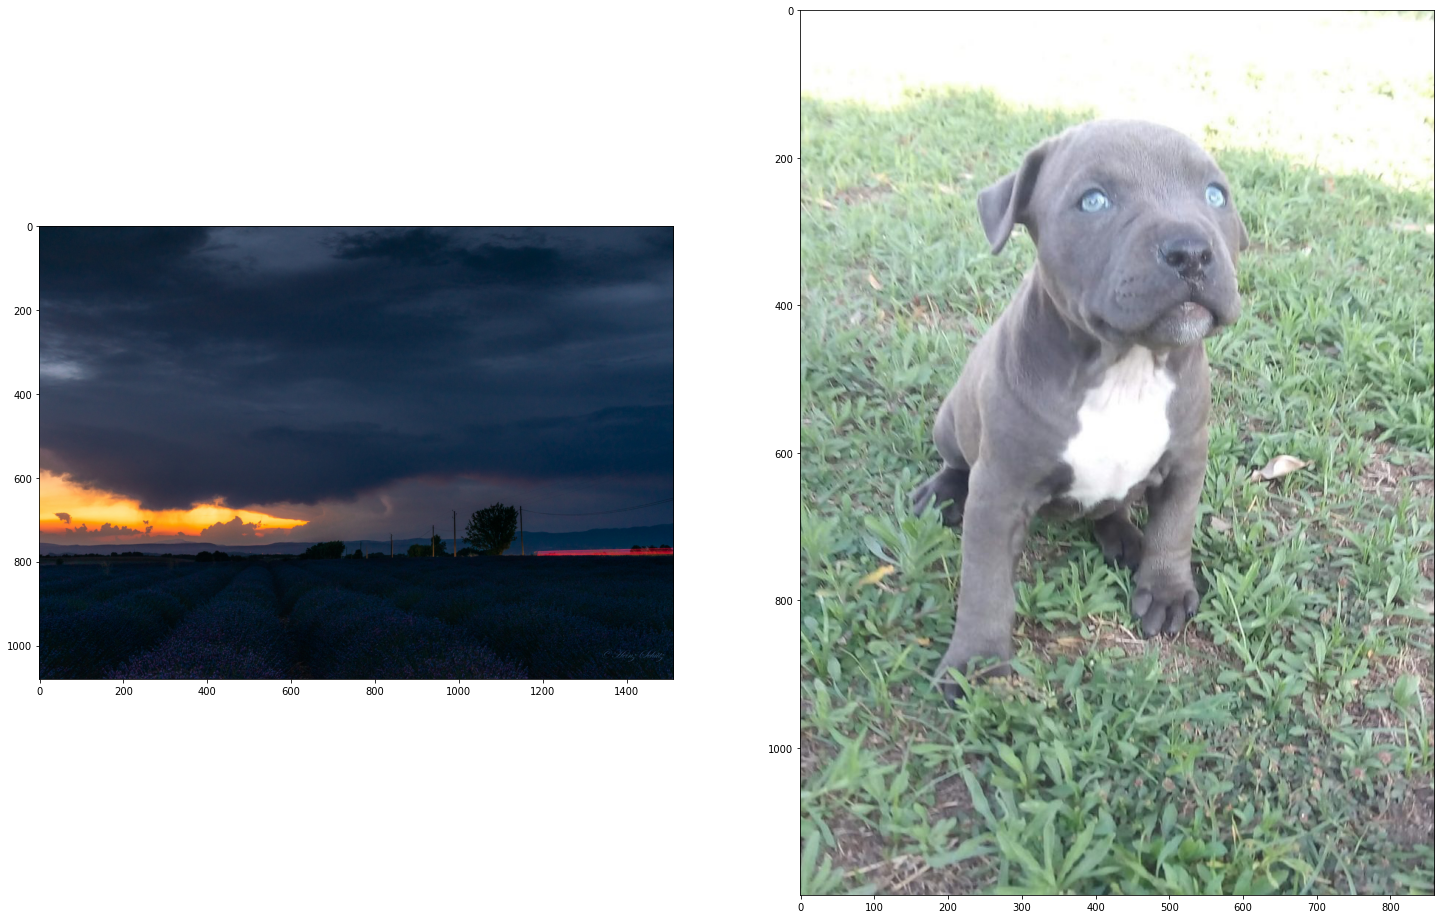

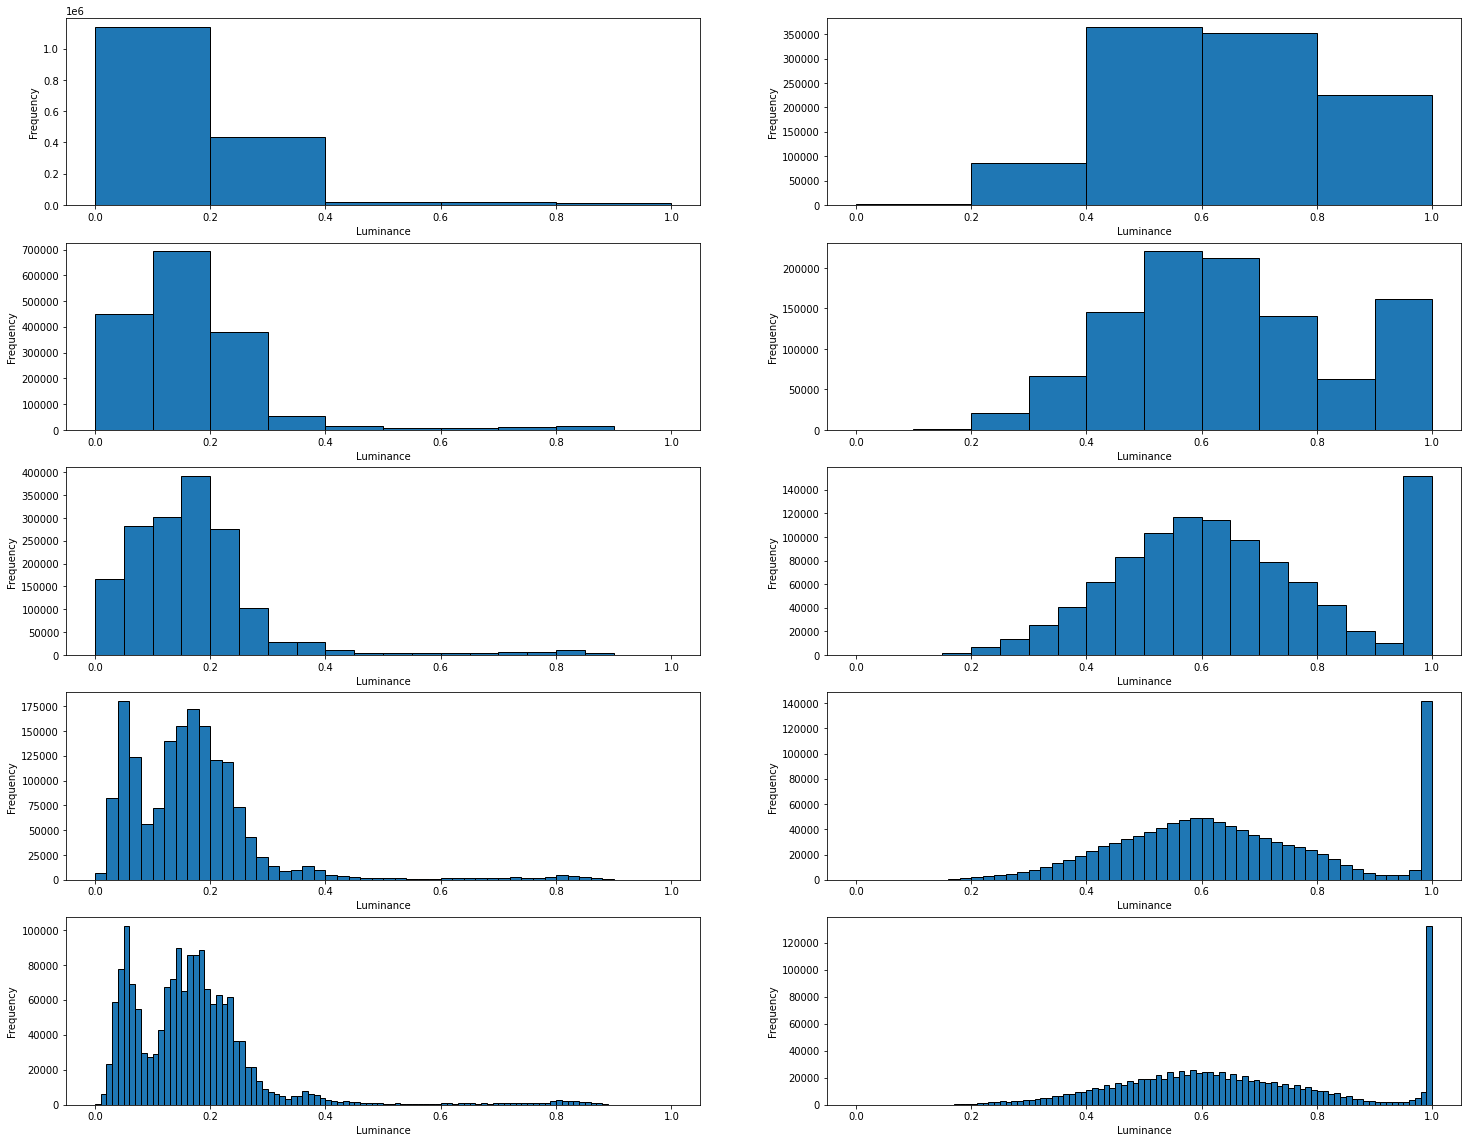

In [18]:
#Luminance histogram
def YIQhist(img, ax, col_q=10):
  assert col_q > 0, "Quantity of columns must be positive."
  imgYIQ = RGBtoYIQ(img).reshape(-1, 3)
  counter = np.zeros(col_q)
  for pix in imgYIQ:
    index = np.int(np.floor(pix[0] * col_q))
    if (index < col_q):
      counter[index] += 1
    elif (index >= col_q):
      counter[col_q - 1] += 1
  #PLOTTING
  #fig, ax = plt.subplots()
  width = 1 / col_q
  x_axis = np.linspace(0, 1, col_q + 1)
  ax.bar(x_axis[:-1] + width / 2, counter, width=width, edgecolor='k')
  ax.set_ylabel('Frequency')
  ax.set_xlabel('Luminance')

#UPLOADING IMAGE AS A NUMPY IMAGE
img_lanscape = imageio.imread(drive_dir + 'paisaje.jpg')
img_minipit = imageio.imread(drive_dir + 'minipitbull.jpg')
fig_img, axs_img = plt.subplots(1, 2, figsize=(25, 20))
axs_img[0].imshow(img_lanscape)
axs_img[1].imshow(img_minipit)
plt.show()

#PLOTTING
fig_hist, axs_hist = plt.subplots(5, 2, figsize=(25, 20))
#Lanscape image
YIQhist(img_lanscape, axs_hist[0, 0], 5)
YIQhist(img_lanscape, axs_hist[1, 0], 10)
YIQhist(img_lanscape, axs_hist[2, 0], 20)
YIQhist(img_lanscape, axs_hist[3, 0], 50)
YIQhist(img_lanscape, axs_hist[4, 0], 100)
#Pitbull image
YIQhist(img_minipit, axs_hist[0, 1], 5)
YIQhist(img_minipit, axs_hist[1, 1], 10)
YIQhist(img_minipit, axs_hist[2, 1], 20)
YIQhist(img_minipit, axs_hist[3, 1], 50)
YIQhist(img_minipit, axs_hist[4, 1], 100)
plt.show()
  

Las dos imágenes utilizadas son, en el primer caso, una imagen de un paisaje tomada durante el atardecer, que ha quedado muy oscura; en el segundo caso, es una fotografía de un cachorro, la cual resultó muy iluminada. 

Estas primeras impresiones quedan demostradas por sus propios histogramas de luminancia. Para la imagen del paisaje, vemos que la luminancia general está muy sesgada a la izquierda, mientras que en la imagen del cachorro, la luminancia está sesgada a la derecha. La distribución es mucho más recisa a medida que reducimos el tamaño de los subintervalos de luminancia.

LANSCAPE IMAGE SCALAR LUMINANCE PRODUCT:


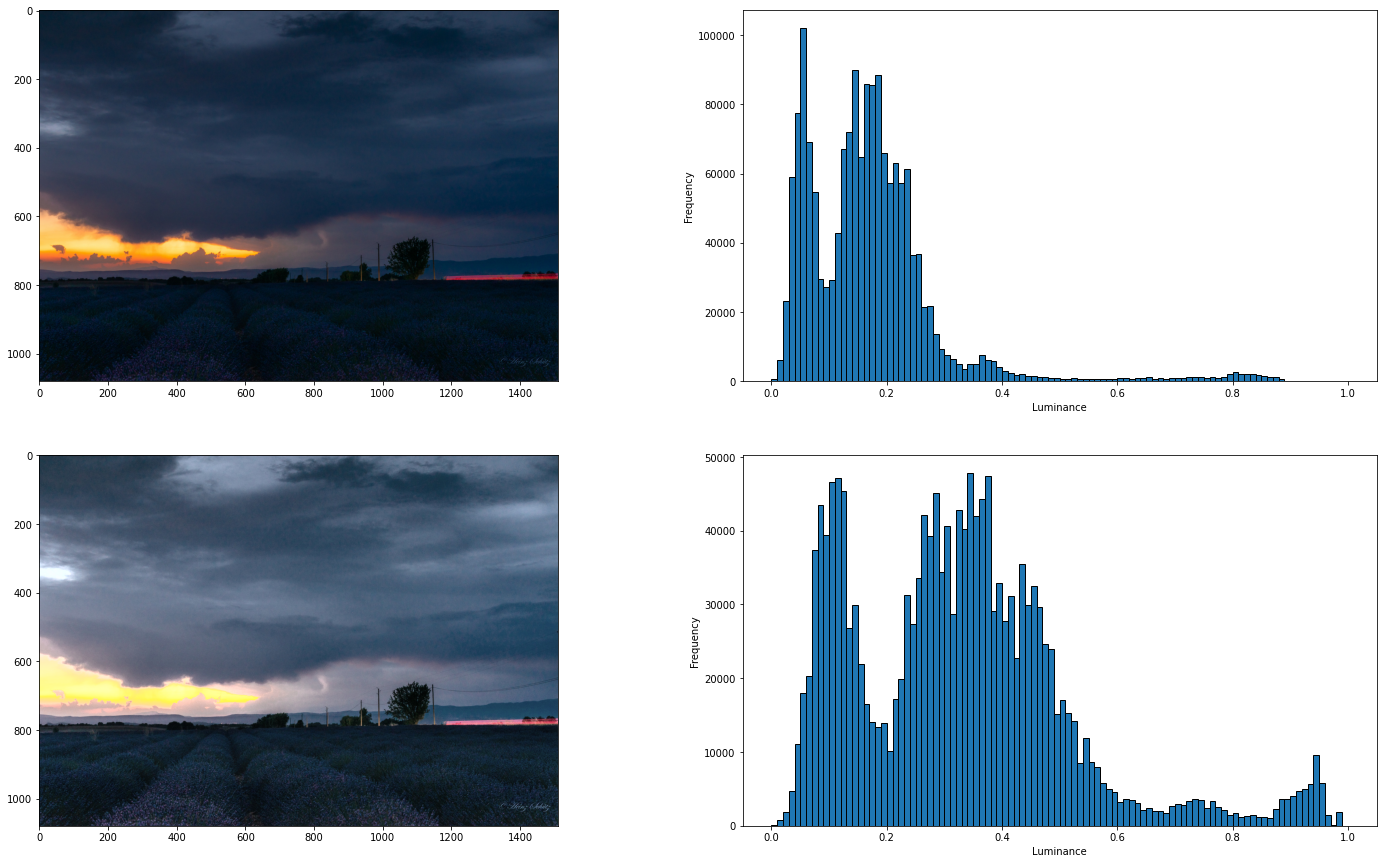

In [36]:
#@title Scalar Luminance Multiplication {run:"auto"}
def multiply_Y(img, alpha):
  imgYIQ = RGBtoYIQ(img)
  imgYIQ[:, :, 0] *= alpha
  np.clip(imgYIQ[:, :, 0], 0, 1, out=imgYIQ[:, :, 0])
  return YIQtoRGB(imgYIQ)

alpha = 2 #@param {type:"slider", min:0, max:5, step:0.01}

#LANSCAPE IMAGE
print('LANSCAPE IMAGE SCALAR LUMINANCE PRODUCT:')
fig_alpha, axs_alpha = plt.subplots(2, 2, figsize=(25, 15))
img_YIQ = multiply_Y(img_lanscape, alpha)
axs_alpha[0, 0].imshow(img_lanscape)
YIQhist(img_lanscape, axs_alpha[0, 1], 100)
axs_alpha[1, 0].imshow(img_YIQ)
YIQhist(img_YIQ, axs_alpha[1, 1], 100)
plt.show()

Para el caso de la imagen del paisaje, es esperable que queramos aumentar su luminancia multiplicándola por un factor mayor a 1. Sin embargo, como podemos apreciar los resultados anteriores, el efecto real es que los colores comienzan a tender al blanco cuanto más grande es el factor de multiplicación, como se muestra en la segunda imagen.
 
Si graficamos los histogramas de luminancia, vemos que la "forma" del histograma se conserva proporcional al factor con el que se multiplicó. Esto significa que el producto por un escalar ilumina realmente la imagen, pero no la hace más nítida pues, por ejemplo, las zonas de la imagen que ya tenían buena iluminación, pierden relación con las zonas menos iluminadas, dado que de estas primeras proviene la luz hacia el resto de la imagen.

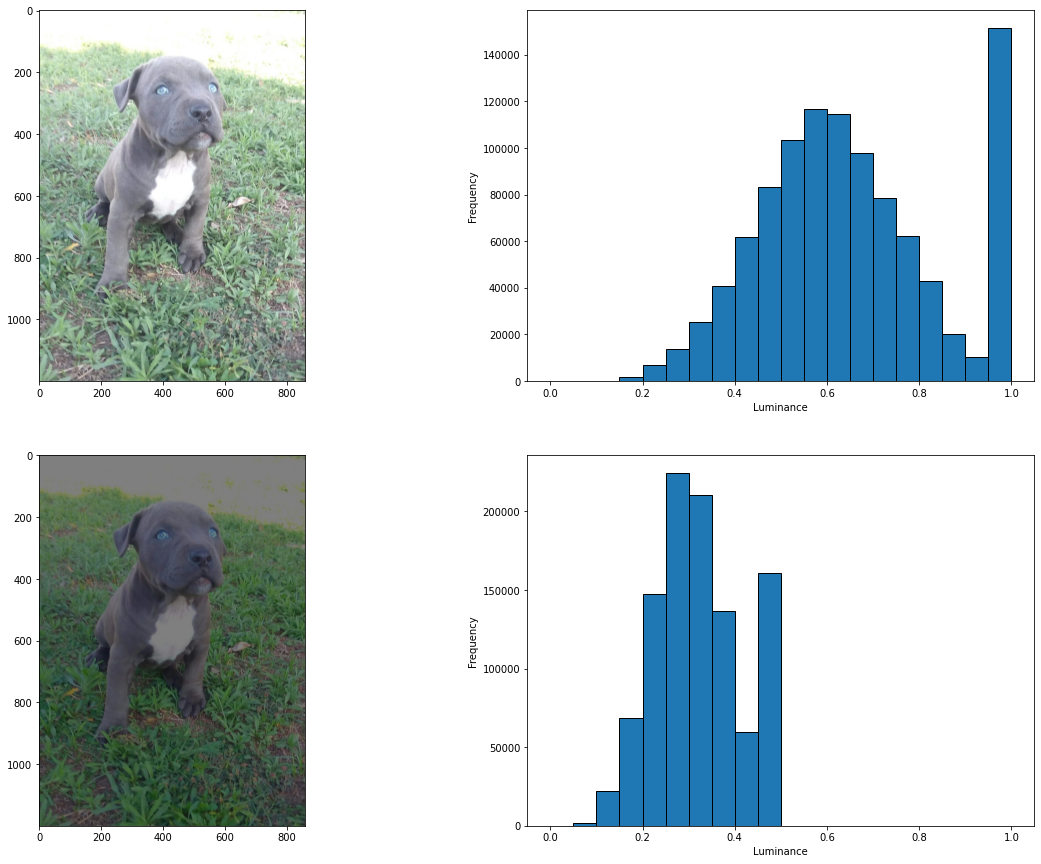

In [24]:
#@title Scalar Luminance Multiplication {run:"auto"}
def multiply_Y(img, alpha):
  imgYIQ = RGBtoYIQ(img)
  imgYIQ[:, :, 0] *= alpha
  np.clip(imgYIQ[:, :, 0], 0, 1, out=imgYIQ[:, :, 0])
  return YIQtoRGB(imgYIQ)

alpha = 0.5 #@param {type:"slider", min:0, max:5, step:0.01}

#LANSCAPE IMAGE
fig_alpha_2, axs_alpha_2 = plt.subplots(2, 2, figsize=(20, 15))
img_YIQ = multiply_Y(img_minipit, alpha)
axs_alpha_2[0, 0].imshow(img_minipit)
YIQhist(img_minipit, axs_alpha_2[0, 1], 20)
axs_alpha_2[1, 0].imshow(img_YIQ)
YIQhist(img_YIQ, axs_alpha_2[1, 1], 20)
plt.show()

De forma análoga, para la imagen del cachorro, sería esperable que si multiplicamos la luminancia por un escalar entre 0 y 1, "quitamos" ese exceso de luminancia. Aunque la imagen efectivamente reduce su luminancia global, nuevamente no obtenemos como resultado una imagen más nítida.

Esto se debe a que el problema real no se encuentra en la "cantidad" neta de luminancia, sino en el contraste, que podemos definir a grandes rasgos como la **distribución de la luminancia de una imagen**. Las similitudes entre ambos ejemplos utilizados es que la distribución de sus luminancias se encuentran sesgadas y concentradas en un sector de todo el posible rango de luminancia. Esto implica que las imágenes tienen poco contraste. Por el contrario, una imagen con mucho contraste implica que su luminancia se encuentra distribuida en todo su rango, sin sesgos pronunciados ni muy concentrada en una zona particular.

Un ejemplo de una imagen con bastante contraste es la imagen del lémur que hemos venido usando hasta ahora, que mostramso a continuación con su histograma de luminancia. Como podemos apreciar, su histograma tiene efectivamente un sesgo hacia la izquierda, pero la densidad de luminancia no es mucho mayor que con la densidad en el lado derecho. En contraposición, en los histogramas de luminancia de las imágenes anteriores hubieron sectores donde la luminancia era nula. Podemos concluir, en base a esta relación entre densidades de luminancia entre distintos sectores del histograma, que esta última imagen tiene mayor constraste (es decir, la luminancia está mayormente distribuida) que las imágenes anteriores. 


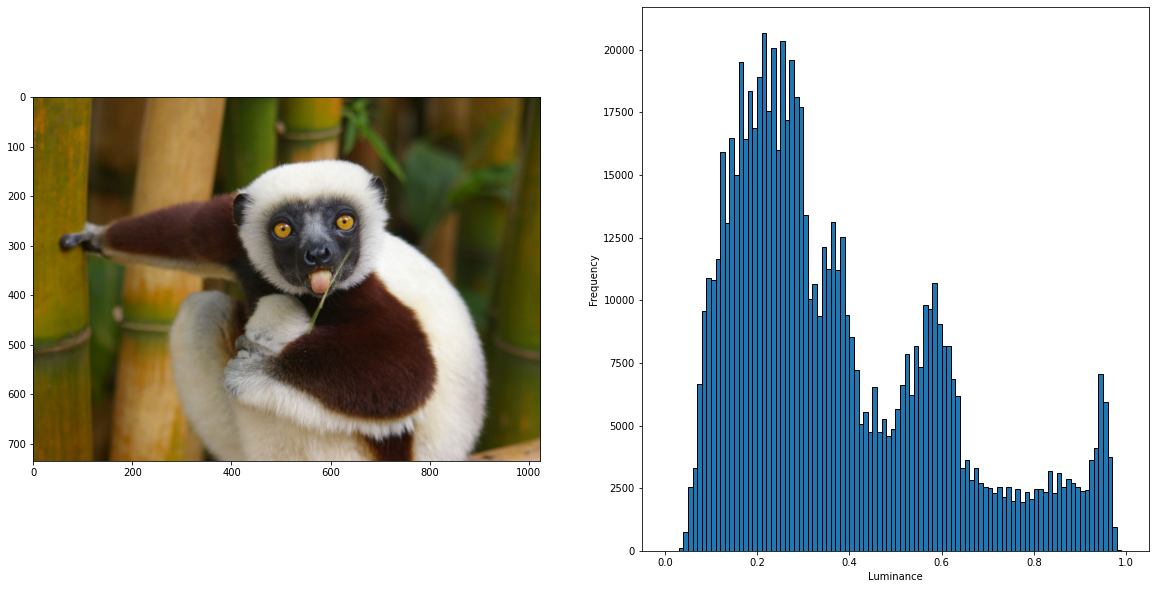

In [27]:
#HIGH CONTRAST EXAMPLE
img_lemur = imageio.imread(drive_dir + 'lemur.jpg')
fig_ejem, axs_ejem = plt.subplots(1, 2, figsize=(20, 10))
axs_ejem[0].imshow(img_lemur)
YIQhist(img_lemur, axs_ejem[1], 100)
plt.show()

In [46]:
#HISTOGRAM DISTRIBUTION

def hist_distribute(img, htype='linear', Ymin=None, Ymax=None):
  imgYIQ = RGBtoYIQ(img)
  if htype == 'linear': #BRANCH LINEAR FUNCTION
    assert not (Ymin is None and Ymax is None) or Ymin <= Ymax, 'Limits cannot be None'
    alpha = 1 / (Ymax - Ymin)
    imgYIQ[:, :, 0] = np.where(imgYIQ[:,:, 0] < Ymin, 0, np.where(imgYIQ[:,:, 0] <= Ymax, alpha * imgYIQ[:, :, 0], 1))

  elif htype == 'sqrt': #SQUARED ROOT FUNCTION
    imgYIQ[:, :, 0] = np.sqrt(imgYIQ[:, :, 0])
  
  elif htype == 'square': #SQUARED FUNCTION
    imgYIQ[:, :, 0] = np.power(imgYIQ[:, :, 0], 2)

  elif htype == 'cubic': #CUBIC FUNCTION
    imgYIQ[:, :, 0] = np.power(imgYIQ[:, :, 0], 3)
  
  return YIQtoRGB(imgYIQ)

Tres filtros fueron implementados para alterar el histograma de luminancia:

* **Lineal a trozos**: se establece un a alteración lineal creciente de los valores de luminancia que se encuentran en un intervalo $[Y_{min}, Y_{max}]$. Los valores que queden por debajo de $Y_{min}$ se reducen a 0 y los que est[an por encima de $Y_{max}$, se elevan a 1. Es el filtro más básico, y en general resulta útil cuando la densidad de luminancia predominante está ubicada en el centro del histograma, de forma que aplicar este filtro produce un despliegue hacia los lados.

* **Raíz cuadrada**: la luminancia alterada es el resultado de aplicar raíz cuadrada a los valores de luminancia. Este filtro es útil para los histogramas sesgados a la izquierda, ya que para un número $x\in [0, 1]$, $x \leq \sqrt{x}$. Por tanto, el histograma suele desplazarse hacia el centro.

* **Polinómica**: recíprocamente, este filtro tiende a decaer la luminancia de una imagen, ya que para un número $x\in [0, 1]$, $x^n \leq x$ para $n \in \mathbb{N}$. Es, por tanto, útil cuando se tiene una imagen cuyo histograma de luminancia está sesgado a la derecha. Se implementa aquí es menos agresivo de todos, donde $n=2$.

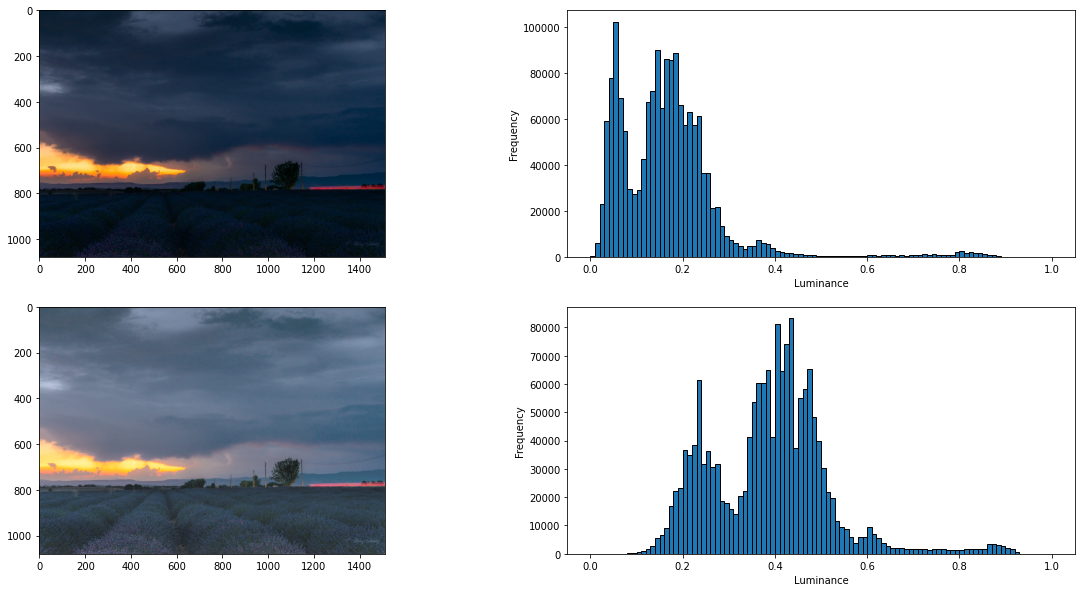

In [59]:
#@title Histogram Distribution {run:"auto"}

htype = 'sqrt' #@param ['linear','sqrt', 'squared', 'cubic']
ymin = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
ymax = 0.9 #@param {type:"slider", min:0, max:1, step:0.01}

fig_lans_alter, axs_lans_alter = plt.subplots(2, 2, figsize=(20, 10))
img_hist = hist_distribute(img_lanscape, htype, ymin, ymax)
axs_lans_alter[0, 0].imshow(img_lanscape)
YIQhist(img_lanscape, axs_lans_alter[0, 1], 100)
axs_lans_alter[1, 0].imshow(img_hist)
YIQhist(img_hist, axs_lans_alter[1, 1], 100)
plt.show()

Como hemos dicho antes, el filtro lineal a trozos tiene un efecto similar a hacer el producto por un escalar, con el agregado de que los valores fuera del rango de la rama lineal, son llevados a 0 o 1, destruyendo su información. Por tanto la imagen no mejora con este filtro.

Ahora bien, si aplicamos el filtro radical, vemos que la imagen efectivamente mejora levemente el contraste. El histograma se desplaza más hacia el centro y se despliega un poco más. ESe hace visible así su resultado en la segunda imagen.

Por último, el caso de la polinómica de grado 2 resulta inefectivo, ya que la densidad de luminancia a la derecha es muy baja como para producir cambios notables.

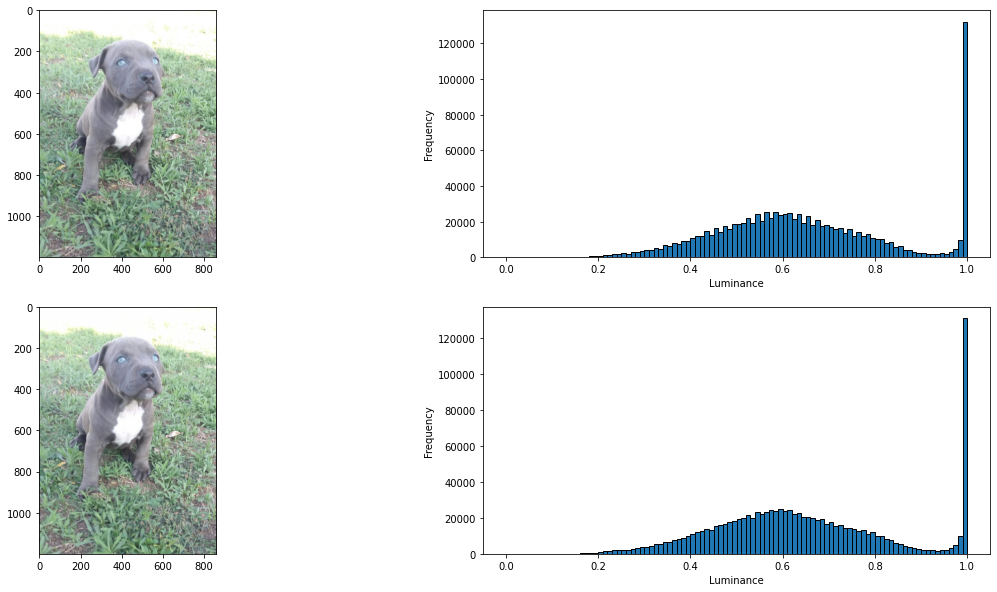

In [62]:
#@title Histogram Distribution {run:"auto"}

htype = 'cubic' #@param ['linear','sqrt', 'squared', 'cubic']
ymin = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}
ymax = 1 #@param {type:"slider", min:0, max:1, step:0.01}

fig_pit_alter, axs_pit_alter = plt.subplots(2, 2, figsize=(20, 10))
img_hist = hist_distribute(img_minipit, htype, ymin, ymax)
axs_pit_alter[0, 0].imshow(img_minipit)
YIQhist(img_minipit, axs_pit_alter[0, 1], 100)
axs_pit_alter[1, 0].imshow(img_hist)
YIQhist(img_hist, axs_pit_alter[1, 1], 100)
plt.show()

Para un caso opuesto, donde la luminancia está concentrada en la derecha del histograma, vemos que el filtro lineal no surte efectos que mejoren el contraste. Podemos decir lo mismo del filtro radical, pues el cambio que produce en los sectores de mayor luminancia es mucho menor.

Podríamos esperar que el filtro polinómico sea efectivo en este caso, ya que busca redistribuir la densidad de luminancia hacia el centro del histograma. Sin embargo, al aplicarlo vemos que no hay efecto alguno casi. Esto se debe a que es muy poco agresivo para esta distribución de luminancia, o que se requiere otro tipo de filtro para alterar la luminancia.